In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
accidents_df = pd.read_csv('class_one_accidents.csv')
accidents_df.head()

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month
0,NS,Norfolk Southern Railway Company,2022,22,7,Derailment,Norfolk Southern Railway Company,22 7
1,CSX,CSX Transportation,2017,17,12,Derailment,CSX Transportation,17 12
2,NS,Norfolk Southern Railway Company,2022,22,7,Derailment,Norfolk Southern Railway Company,22 7
3,UP,Union Pacific Railroad Company,2022,22,2,Derailment,Union Pacific Railroad Company,22 2
4,UP,Union Pacific Railroad Company,2022,22,11,Derailment,Union Pacific Railroad Company,22 11


In [6]:
bnsf_df = accidents_df[accidents_df['railroad'] == 'BNSF Railway Company']
bnsf_df['tally'] = bnsf_df.groupby("accident_year_and_month")['Reporting Railroad Code'].transform('count')
bnsf_df = bnsf_df.drop_duplicates(subset=['accident_year_and_month', 'tally'])
bnsf_df

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month,tally
11,BNSF,BNSF Railway Company,2022,22,5,Derailment,BNSF Railway Company,22 5,16
12,BNSF,BNSF Railway Company,2017,17,3,Derailment,BNSF Railway Company,17 3,18
13,BNSF,BNSF Railway Company,2017,17,9,Derailment,BNSF Railway Company,17 9,15
14,BNSF,BNSF Railway Company,2017,17,8,Derailment,BNSF Railway Company,17 8,28
16,BNSF,BNSF Railway Company,2017,17,6,Derailment,BNSF Railway Company,17 6,24
...,...,...,...,...,...,...,...,...,...
4473,BNSF,BNSF Railway Company,2018,18,3,Derailment,BNSF Railway Company,18 3,26
4520,BNSF,BNSF Railway Company,2018,18,7,Derailment,BNSF Railway Company,18 7,31
4540,BNSF,BNSF Railway Company,2018,18,9,Derailment,BNSF Railway Company,18 9,24
4568,BNSF,BNSF Railway Company,2018,18,8,Derailment,BNSF Railway Company,18 8,21


In [7]:
from datetime import datetime
bnsf_miles_traveled_data = pd.read_csv('bnsf_miles_traveled_data.csv')
bnsf_miles_traveled_data.head()
bnsf_miles_traveled_data['accident_year_and_month'] = bnsf_miles_traveled_data['Month of Combined Date'].apply(lambda x: datetime.strptime(x, '%B %Y').strftime('%y %m'))
bnsf_miles_traveled_data['accident_year_and_month'] = bnsf_miles_traveled_data['accident_year_and_month'].str.replace(r'\b0', '')
bnsf_miles_traveled_data.head()

,Display Year,Month of Combined Date,Measure Names,Measure Values,accident_year_and_month
0,2017,December 2017,Total Train Miles,15482144,17 12
1,2017,November 2017,Total Train Miles,15440507,17 11
2,2017,October 2017,Total Train Miles,15925185,17 10
3,2017,September 2017,Total Train Miles,14971635,17 9
4,2017,August 2017,Total Train Miles,15360649,17 8


In [8]:
merged_df_3 = bnsf_df.merge(bnsf_miles_traveled_data, left_on='accident_year_and_month', right_on='accident_year_and_month')
merged_df_3.head()
merged_df_3['Measure Values'] = merged_df_3['Measure Values'] / 1000000
merged_df_3.head()
merged_df_3['accidents_per_million_miles_traveled'] = merged_df_3['tally'] / merged_df_3['Measure Values']
merged_df_3.head()
len(merged_df_3)

72

In [9]:
bnsf_df = merged_df_3

In [10]:
union_pacific_df = accidents_df[accidents_df['railroad'] == 'Union Pacific Railroad Company']
union_pacific_df['tally'] = union_pacific_df.groupby("accident_year_and_month")['Reporting Railroad Code'].transform('count')
union_pacific_df = union_pacific_df.drop_duplicates(subset=['accident_year_and_month', 'tally'])
union_pacific_df.head()

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month,tally
3,UP,Union Pacific Railroad Company,2022,22,2,Derailment,Union Pacific Railroad Company,22 2,20
4,UP,Union Pacific Railroad Company,2022,22,11,Derailment,Union Pacific Railroad Company,22 11,35
5,UP,Union Pacific Railroad Company,2022,22,1,Derailment,Union Pacific Railroad Company,22 1,23
9,UP,Union Pacific Railroad Company,2017,17,4,Derailment,Union Pacific Railroad Company,17 4,13
15,UP,Union Pacific Railroad Company,2017,17,11,Derailment,Union Pacific Railroad Company,17 11,27


In [11]:
up_miles_traveled_data = pd.read_csv('/Users/rachelp/Downloads/up_miles_traveled.csv')
up_miles_traveled_data.head()
up_miles_traveled_data['accident_year_and_month'] = up_miles_traveled_data['Month of Combined Date'].apply(lambda x: datetime.strptime(x, '%B %Y').strftime('%y %m'))
up_miles_traveled_data['accident_year_and_month'] = up_miles_traveled_data['accident_year_and_month'].str.replace(r'\b0', '')
up_miles_traveled_data

,Display Year,Month of Combined Date,Measure Names,Measure Values,accident_year_and_month
0,2017,December 2017,Total Train Miles,12350077,17 12
1,2017,November 2017,Total Train Miles,12326967,17 11
2,2017,October 2017,Total Train Miles,13277725,17 10
3,2017,September 2017,Total Train Miles,12513499,17 9
4,2017,August 2017,Total Train Miles,13020309,17 8
...,...,...,...,...,...
67,2022,May 2022,Total Train Miles,9686706,22 5
68,2022,April 2022,Total Train Miles,9346652,22 4
69,2022,March 2022,Total Train Miles,9864030,22 3
70,2022,February 2022,Total Train Miles,8978280,22 2


In [12]:
up_df = union_pacific_df.merge(up_miles_traveled_data, left_on='accident_year_and_month', right_on='accident_year_and_month')
up_df['Measure Values'] = up_df['Measure Values'] / 1000000
up_df['accidents_per_million_miles_traveled'] = up_df['tally'] / up_df['Measure Values']
len(up_df)

72

In [13]:
ns_df = accidents_df[accidents_df['railroad'] == 'Norfolk Southern Railway Company']
ns_df['tally'] = ns_df.groupby("accident_year_and_month")['Reporting Railroad Code'].transform('count')
ns_df = ns_df.drop_duplicates(subset=['accident_year_and_month', 'tally'])
ns_df

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month,tally
0,NS,Norfolk Southern Railway Company,2022,22,7,Derailment,Norfolk Southern Railway Company,22 7,12
18,NS,Norfolk Southern Railway Company,2022,22,2,Derailment,Norfolk Southern Railway Company,22 2,9
19,NS,Norfolk Southern Railway Company,2022,22,3,Derailment,Norfolk Southern Railway Company,22 3,14
26,NS,Norfolk Southern Railway Company,2022,22,1,Derailment,Norfolk Southern Railway Company,22 1,12
67,NS,Norfolk Southern Railway Company,2017,17,5,Derailment,Norfolk Southern Railway Company,17 5,23
...,...,...,...,...,...,...,...,...,...
4500,NS,Norfolk Southern Railway Company,2018,18,1,Derailment,Norfolk Southern Railway Company,18 1,25
4502,NS,Norfolk Southern Railway Company,2018,18,2,Derailment,Norfolk Southern Railway Company,18 2,16
4515,NS,Norfolk Southern Railway Company,2018,18,11,Derailment,Norfolk Southern Railway Company,18 11,15
4563,NS,Norfolk Southern Railway Company,2018,18,4,Derailment,Norfolk Southern Railway Company,18 4,13


In [14]:
ns_miles_traveled_data = pd.read_csv('norfolk_southern_traveled.csv')
ns_miles_traveled_data.head()
ns_miles_traveled_data['accident_year_and_month'] = ns_miles_traveled_data['Month of Combined Date'].apply(lambda x: datetime.strptime(x, '%B %Y').strftime('%y %m'))
ns_miles_traveled_data['accident_year_and_month'] = ns_miles_traveled_data['accident_year_and_month'].str.replace(r'\b0', '')
ns_miles_traveled_data.head()

,Display Year,Month of Combined Date,Measure Names,Measure Values,accident_year_and_month
0,2017,December 2017,Total Train Miles,7294007,17 12
1,2017,November 2017,Total Train Miles,7420478,17 11
2,2017,October 2017,Total Train Miles,7751247,17 10
3,2017,September 2017,Total Train Miles,7356282,17 9
4,2017,August 2017,Total Train Miles,7811337,17 8


In [15]:
ns_df = ns_df.merge(ns_miles_traveled_data, left_on='accident_year_and_month', right_on='accident_year_and_month')
ns_df['Measure Values'] = ns_df['Measure Values'] / 1000000
ns_df['accidents_per_million_miles_traveled'] = ns_df['tally'] / ns_df['Measure Values']
len(ns_df)

72

In [16]:
csx_df = accidents_df[accidents_df['railroad'] == 'CSX Transportation']
csx_df['tally'] = csx_df.groupby("accident_year_and_month")['Reporting Railroad Code'].transform('count')
csx_df = csx_df.drop_duplicates(subset=['accident_year_and_month', 'tally'])
csx_df

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month,tally
1,CSX,CSX Transportation,2017,17,12,Derailment,CSX Transportation,17 12,13
49,CSX,CSX Transportation,2017,17,1,Derailment,CSX Transportation,17 1,13
73,CSX,CSX Transportation,2022,22,1,Derailment,CSX Transportation,22 1,10
77,CSX,CSX Transportation,2022,22,10,Derailment,CSX Transportation,22 10,13
79,CSX,CSX Transportation,2022,22,11,Derailment,CSX Transportation,22 11,15
...,...,...,...,...,...,...,...,...,...
4595,CSX,CSX Transportation,2018,18,10,Derailment,CSX Transportation,18 10,13
4597,CSX,CSX Transportation,2018,18,12,Derailment,CSX Transportation,18 12,9
4599,CSX,CSX Transportation,2018,18,6,Derailment,CSX Transportation,18 6,17
4612,CSX,CSX Transportation,2018,18,4,Derailment,CSX Transportation,18 4,19


In [17]:
csx_miles_traveled_data = pd.read_csv('csx_traveled.csv')
csx_miles_traveled_data.head()
csx_miles_traveled_data['accident_year_and_month'] = csx_miles_traveled_data['Month of Combined Date'].apply(lambda x: datetime.strptime(x, '%B %Y').strftime('%y %m'))
csx_miles_traveled_data['accident_year_and_month'] = csx_miles_traveled_data['accident_year_and_month'].str.replace(r'\b0', '')
csx_miles_traveled_data.head()

,Display Year,Month of Combined Date,Measure Names,Measure Values,accident_year_and_month
0,2017,December 2017,Total Train Miles,6233531,17 12
1,2017,November 2017,Total Train Miles,6225892,17 11
2,2017,October 2017,Total Train Miles,6578685,17 10
3,2017,September 2017,Total Train Miles,6157209,17 9
4,2017,August 2017,Total Train Miles,6450223,17 8


In [18]:
csx_df = csx_df.merge(csx_miles_traveled_data, left_on='accident_year_and_month', right_on='accident_year_and_month')
csx_df['Measure Values'] = csx_df['Measure Values'] / 1000000
csx_df['accidents_per_million_miles_traveled'] = csx_df['tally'] / csx_df['Measure Values']
len(csx_df)

72

In [19]:
canadian_nat_df = accidents_df[accidents_df['railroad'] == 'Canadian National - North America']
canadian_nat_df['tally'] = canadian_nat_df.groupby("accident_year_and_month")['Reporting Railroad Code'].transform('count')
canadian_nat_df = canadian_nat_df.drop_duplicates(subset=['accident_year_and_month', 'tally'])
canadian_nat_df

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month,tally
7,CC,"Chicago, Central & Pacific Railroad Company",2017,17,8,Derailment,Canadian National - North America,17 8,4
24,IC,Illinois Central Railroad Company,2022,22,8,Derailment,Canadian National - North America,22 8,1
62,CC,"Chicago, Central & Pacific Railroad Company",2022,22,6,Derailment,Canadian National - North America,22 6,4
98,IC,Illinois Central Railroad Company,2017,17,1,Derailment,Canadian National - North America,17 1,3
132,WC,WISCONSIN CENTRAL LTD.,2017,17,6,Derailment,Canadian National - North America,17 6,7
...,...,...,...,...,...,...,...,...,...
4761,WC,WISCONSIN CENTRAL LTD.,2018,18,7,Derailment,Canadian National - North America,18 7,3
4767,WC,WISCONSIN CENTRAL LTD.,2018,18,8,Derailment,Canadian National - North America,18 8,2
4768,WC,WISCONSIN CENTRAL LTD.,2018,18,9,Derailment,Canadian National - North America,18 9,2
4930,GTW,GRAND TRUNK WESTERN RAILROAD INC.,2018,18,4,Derailment,Canadian National - North America,18 4,4


In [20]:
canadiannat_miles_traveled_data = pd.read_csv('canadian_nat.csv')
canadiannat_miles_traveled_data['accident_year_and_month'] = canadiannat_miles_traveled_data['Month of Combined Date'].apply(lambda x: datetime.strptime(x, '%B %Y').strftime('%y %m'))
canadiannat_miles_traveled_data['accident_year_and_month'] = canadiannat_miles_traveled_data['accident_year_and_month'].str.replace(r'\b0', '')
canadiannat_miles_traveled_data.head()


,Display Year,Month of Combined Date,Measure Names,Measure Values,accident_year_and_month
0,2017,December 2017,Total Train Miles,1622029,17 12
1,2017,November 2017,Total Train Miles,1647793,17 11
2,2017,October 2017,Total Train Miles,1702978,17 10
3,2017,September 2017,Total Train Miles,1617992,17 9
4,2017,August 2017,Total Train Miles,1637586,17 8


In [21]:
canadian_nat = canadian_nat_df.merge(canadiannat_miles_traveled_data, left_on='accident_year_and_month', right_on='accident_year_and_month')
canadian_nat['Measure Values'] = canadian_nat['Measure Values'] / 1000000
canadian_nat['accidents_per_million_miles_traveled'] = canadian_nat['tally'] / canadian_nat['Measure Values']
len(canadian_nat)

65

In [22]:
kansas_df = accidents_df[accidents_df['railroad'] == 'Kansas City Southern Railway Company']
kansas_df['tally'] = kansas_df.groupby("accident_year_and_month")['Reporting Railroad Code'].transform('count')
kansas_df = kansas_df.drop_duplicates(subset=['accident_year_and_month', 'tally'])
kansas_df

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month,tally
25,KCS,Kansas City Southern Railway Company,2022,22,1,Derailment,Kansas City Southern Railway Company,22 1,3
123,KCS,Kansas City Southern Railway Company,2017,17,11,Derailment,Kansas City Southern Railway Company,17 11,2
147,KCS,Kansas City Southern Railway Company,2022,22,5,Derailment,Kansas City Southern Railway Company,22 5,4
218,KCS,Kansas City Southern Railway Company,2022,22,2,Derailment,Kansas City Southern Railway Company,22 2,1
433,KCS,Kansas City Southern Railway Company,2022,22,7,Derailment,Kansas City Southern Railway Company,22 7,1
...,...,...,...,...,...,...,...,...,...
5143,KCS,Kansas City Southern Railway Company,2018,18,11,Derailment,Kansas City Southern Railway Company,18 11,1
5369,KCS,Kansas City Southern Railway Company,2018,18,7,Derailment,Kansas City Southern Railway Company,18 7,3
5457,KCS,Kansas City Southern Railway Company,2018,18,3,Derailment,Kansas City Southern Railway Company,18 3,1
5471,KCS,Kansas City Southern Railway Company,2018,18,1,Derailment,Kansas City Southern Railway Company,18 1,2


In [23]:
kansas_miles_traveled_data = pd.read_csv('kansas_traveled_miles.csv')
kansas_miles_traveled_data.head()
kansas_miles_traveled_data['accident_year_and_month'] = kansas_miles_traveled_data['Month of Combined Date'].apply(lambda x: datetime.strptime(x, '%B %Y').strftime('%y %m'))
kansas_miles_traveled_data['accident_year_and_month'] = kansas_miles_traveled_data['accident_year_and_month'].str.replace(r'\b0', '')
kansas_miles_traveled_data.head()

,Display Year,Month of Combined Date,Measure Names,Measure Values,accident_year_and_month
0,2017,December 2017,Total Train Miles,858842,17 12
1,2017,November 2017,Total Train Miles,899282,17 11
2,2017,October 2017,Total Train Miles,963114,17 10
3,2017,September 2017,Total Train Miles,918743,17 9
4,2017,August 2017,Total Train Miles,937142,17 8


In [24]:
kansas_df = kansas_df.merge(kansas_miles_traveled_data, left_on='accident_year_and_month', right_on='accident_year_and_month')
kansas_df ['Measure Values'] = kansas_df ['Measure Values'] / 1000000
kansas_df ['accidents_per_million_miles_traveled'] = kansas_df ['tally'] /kansas_df ['Measure Values']
len(kansas_df)

61

In [25]:
kansas_df.head()

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month,tally,Display Year,Month of Combined Date,Measure Names,Measure Values,accidents_per_million_miles_traveled
0,KCS,Kansas City Southern Railway Company,2022,22,1,Derailment,Kansas City Southern Railway Company,22 1,3,2022,January 2022,Total Train Miles,0.874657,3.429916
1,KCS,Kansas City Southern Railway Company,2017,17,11,Derailment,Kansas City Southern Railway Company,17 11,2,2017,November 2017,Total Train Miles,0.899282,2.223996
2,KCS,Kansas City Southern Railway Company,2022,22,5,Derailment,Kansas City Southern Railway Company,22 5,4,2022,May 2022,Total Train Miles,0.856300,4.671260
3,KCS,Kansas City Southern Railway Company,2022,22,2,Derailment,Kansas City Southern Railway Company,22 2,1,2022,February 2022,Total Train Miles,0.837206,1.194449
4,KCS,Kansas City Southern Railway Company,2022,22,7,Derailment,Kansas City Southern Railway Company,22 7,1,2022,July 2022,Total Train Miles,0.872991,1.145487


In [26]:
can_pacific_df = accidents_df[accidents_df['railroad'] == 'Canadian Pacific Railway Company']
can_pacific_df['tally'] = can_pacific_df.groupby("accident_year_and_month")['Reporting Railroad Code'].transform('count')
can_pacific_df = can_pacific_df.drop_duplicates(subset=['accident_year_and_month', 'tally'])
can_pacific_df.head()

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month,tally
6,CP,Canadian Pacific Railway Company,2017,17,8,Derailment,Canadian Pacific Railway Company,17 8,1
70,CP,Canadian Pacific Railway Company,2022,22,10,Derailment,Canadian Pacific Railway Company,22 10,2
72,CP,Canadian Pacific Railway Company,2022,22,6,Derailment,Canadian Pacific Railway Company,22 6,2
126,CP,Canadian Pacific Railway Company,2017,17,11,Derailment,Canadian Pacific Railway Company,17 11,2
141,CP,Canadian Pacific Railway Company,2022,22,3,Derailment,Canadian Pacific Railway Company,22 3,2


In [27]:
can_pacific_traveled_data = pd.read_csv('can_pac_miles.csv')
can_pacific_traveled_data['accident_year_and_month'] = can_pacific_traveled_data['Month of Combined Date'].apply(lambda x: datetime.strptime(x, '%B %Y').strftime('%y %m'))
can_pacific_traveled_data['accident_year_and_month'] = can_pacific_traveled_data['accident_year_and_month'].str.replace(r'\b0', '')
can_pacific_traveled_data.head()

,Display Year,Month of Combined Date,Measure Names,Measure Values,accident_year_and_month
0,2017,December 2017,Total Train Miles,738110,17 12
1,2017,November 2017,Total Train Miles,745924,17 11
2,2017,October 2017,Total Train Miles,745597,17 10
3,2017,September 2017,Total Train Miles,731635,17 9
4,2017,August 2017,Total Train Miles,716405,17 8


In [28]:
can_pac_df = can_pacific_df.merge(can_pacific_traveled_data, left_on='accident_year_and_month', right_on='accident_year_and_month')
can_pac_df ['Measure Values'] = can_pac_df['Measure Values'] / 1000000
can_pac_df ['accidents_per_million_miles_traveled'] = can_pac_df['tally'] /can_pac_df['Measure Values']
len(can_pac_df)
can_pac_df.head()

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month,tally,Display Year,Month of Combined Date,Measure Names,Measure Values,accidents_per_million_miles_traveled
0,CP,Canadian Pacific Railway Company,2017,17,8,Derailment,Canadian Pacific Railway Company,17 8,1,2017,August 2017,Total Train Miles,0.716405,1.395858
1,CP,Canadian Pacific Railway Company,2022,22,10,Derailment,Canadian Pacific Railway Company,22 10,2,2022,October 2022,Total Train Miles,0.753076,2.655774
2,CP,Canadian Pacific Railway Company,2022,22,6,Derailment,Canadian Pacific Railway Company,22 6,2,2022,June 2022,Total Train Miles,0.727349,2.749712
3,CP,Canadian Pacific Railway Company,2017,17,11,Derailment,Canadian Pacific Railway Company,17 11,2,2017,November 2017,Total Train Miles,0.745924,2.681238
4,CP,Canadian Pacific Railway Company,2022,22,3,Derailment,Canadian Pacific Railway Company,22 3,2,2022,March 2022,Total Train Miles,0.767527,2.605772


In [29]:
kansas_df = kansas_df[['railroad', 'accident_year_and_month', 'accidents_per_million_miles_traveled']]
can_pac_df = can_pac_df[['railroad', 'accident_year_and_month', 'accidents_per_million_miles_traveled']]
canadian_nat = canadian_nat[['railroad', 'accident_year_and_month', 'accidents_per_million_miles_traveled']]
csx_df = csx_df[['railroad', 'accident_year_and_month', 'accidents_per_million_miles_traveled']]
ns_df = ns_df[['railroad', 'accident_year_and_month', 'accidents_per_million_miles_traveled']]
up_df= up_df[['railroad', 'accident_year_and_month', 'accidents_per_million_miles_traveled']]
bnsf_df = bnsf_df[['railroad', 'accident_year_and_month', 'accidents_per_million_miles_traveled']]
# concatenate the dataframes vertically
merged_df = pd.concat([kansas_df, can_pac_df,canadian_nat,csx_df,ns_df,up_df,bnsf_df], ignore_index=True)
merged_df.to_csv('railways_accident_rate')

In [31]:
accidents_df['railroad'].value_counts()

Union Pacific Railroad Company          2024
BNSF Railway Company                    1536
Norfolk Southern Railway Company         946
CSX Transportation                       812
Canadian National - North America        169
Kansas City Southern Railway Company     146
Canadian Pacific Railway Company          34
Name: railroad, dtype: int64

In [ ]:
accidents_df.groupby('Reporting Parent Railroad Company Name').accident_year_and_month.value_counts()

In [63]:
accidents_df.accident_year_and_month.value_counts(ascending=False)

19 8     216
19 1     209
18 1     194
18 8     192
18 5     192
18 10    184
18 7     182
19 10    180
19 7     177
18 6     177
20 7     176
19 3     172
18 9     172
18 4     171
20 12    170
19 4     169
21 10    169
18 11    167
20 8     164
19 2     164
22 8     163
22 12    163
22 1     162
22 3     162
22 7     162
19 9     159
18 3     159
21 7     159
22 9     158
21 8     157
19 6     157
21 9     153
18 12    152
21 6     151
22 10    151
19 5     149
21 3     149
19 11    148
21 12    147
20 2     146
20 11    145
20 3     145
22 11    145
18 2     144
20 6     143
21 11    143
22 5     141
22 6     140
19 12    140
20 1     139
22 4     139
22 2     139
20 10    138
20 9     138
21 2     136
20 5     133
21 1     133
20 4     130
21 4     126
21 5     120
Name: accident_year_and_month, dtype: int64

In [12]:
stacked_bar_accidents_df = accidents_df.groupby('Reporting Parent Railroad Company Name').accident_year_and_month.value_counts()
stacked_bar_accidents_df.to_csv('stacked_bar_accidents_df')

In [19]:
stacked_bar_accidents_df

Reporting Parent Railroad Company Name  accident_year_and_month
BNSF Railway Company                    19 10                      54
                                        18 9                       52
                                        19 8                       50
                                        19 1                       49
                                        18 7                       46
                                                                   ..
Union Pacific Railroad Company          20 1                       45
                                        21 4                       45
                                        20 6                       43
                                        20 11                      41
                                        22 2                       34
Name: accident_year_and_month, Length: 393, dtype: int64

In [36]:
%%R

# Read data
stacked_bar_accidents_df <- read_csv('stacked_bar_accidents_df')
stacked_bar_accidents_df

Rows: 393 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): railroad, accident_year_and_month
dbl (1): number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 393 × 3
   railroad             accident_year_and_month number
   <chr>                <chr>                    <dbl>
 1 BNSF Railway Company 19 10                       54
 2 BNSF Railway Company 18 9                        52
 3 BNSF Railway Company 19 8                        50
 4 BNSF Railway Company 19 1                        49
 5 BNSF Railway Company 18 7                        46
 6 BNSF Railway Company 18 1                        44
 7 BNSF Railway Company 18 10                       43
 8 BNSF Railway Company 22 12                       43
 9 BNSF Railway Company 22 2                        43
10 BNSF Railway Company 20 7                

In [37]:
%%R 

library(ggplot2)

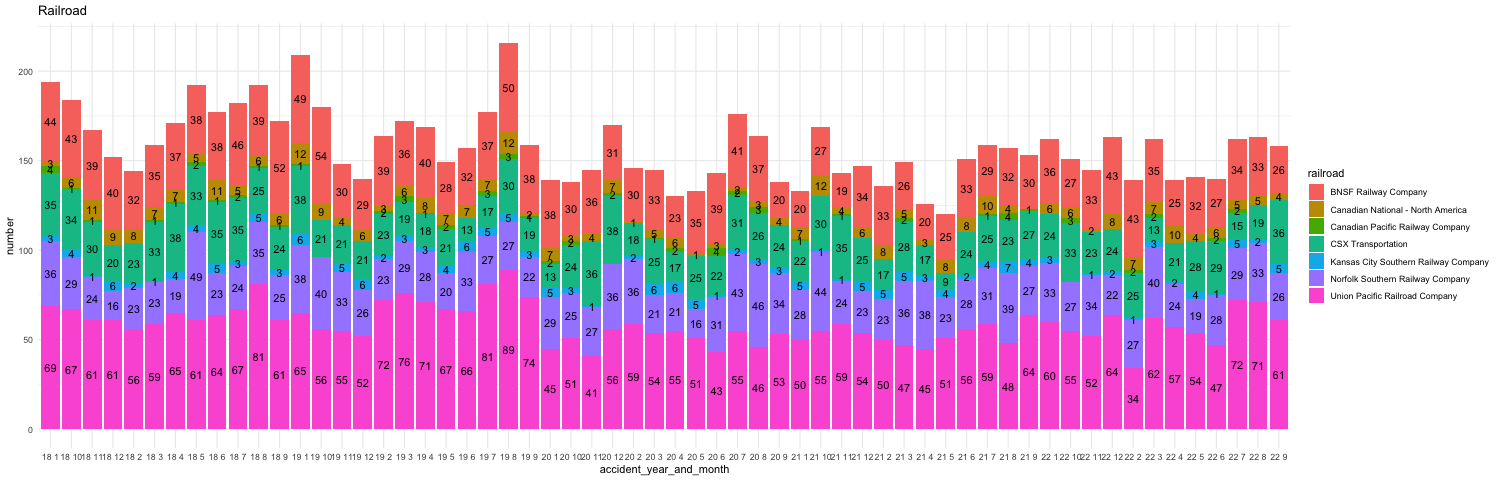

In [42]:
%%R -w 1500
ggplot(stacked_bar_accidents_df) +
  aes(fill=railroad, y=number, x=accident_year_and_month) +
  geom_bar(position="stack", stat="identity") +
  ggtitle("Railroad") +
  theme_minimal() +
  geom_text(aes(label=number), position=position_stack(vjust=0.5))

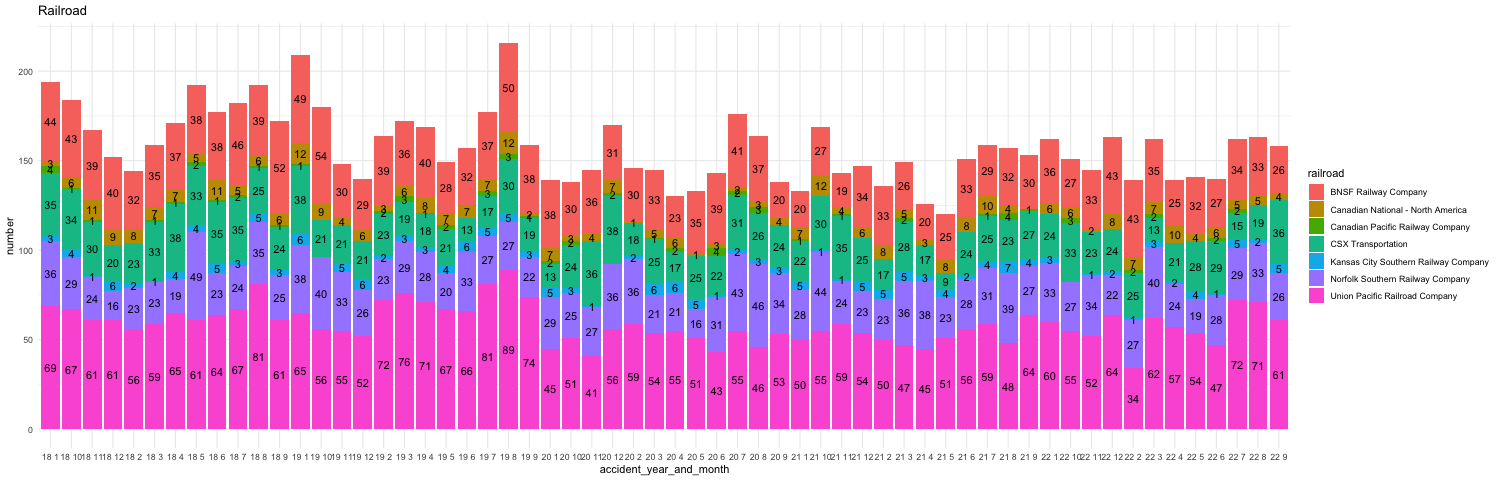

In [53]:
%%R -w 1500


ggplot(stacked_bar_accidents_df, aes(fill=railroad, y=number, x=accident_year_and_month)) +
  geom_bar(position="stack", stat="identity") +
  stat_summary(aes(label=..y..), fun=sum, geom="text", position=position_stack(vjust=0.5)) +
  ggtitle("Railroad") +
  theme_minimal()


In [56]:
stacked_bar_accidents_df_2 = accidents_df.groupby('Reporting Parent Railroad Company Name')['Report Year'].value_counts()
stacked_bar_accidents_df_2.head()

Reporting Parent Railroad Company Name  Report Year
BNSF Railway Company                    2018           483
                                        2019           462
                                        2022           394
                                        2020           393
                                        2021           328
Name: Report Year, dtype: int64

In [57]:
stacked_bar_accidents_df_2.to_csv('stacked_bar_accidents_df_2')

In [58]:
%%R

# Read data
stacked_bar_accidents_df_2 <- read_csv('stacked_bar_accidents_df_2')
stacked_bar_accidents_df_2

Rows: 35 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): railroad
dbl (2): report_year, number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 35 × 3
   railroad             report_year number
   <chr>                      <dbl>  <dbl>
 1 BNSF Railway Company        2018    483
 2 BNSF Railway Company        2019    462
 3 BNSF Railway Company        2022    394
 4 BNSF Railway Company        2020    393
 5 BNSF Railway Company        2021    328
 6 CSX Transportation          2018    365
 7 CSX Transportation          2020    299
 8 CSX Transportation          2022    290
 9 CSX Transportation          2021    282
10 CSX Transportation          2019    261
# … with 25 more rows
# ℹ Use `print(n = ...)` to see more rows


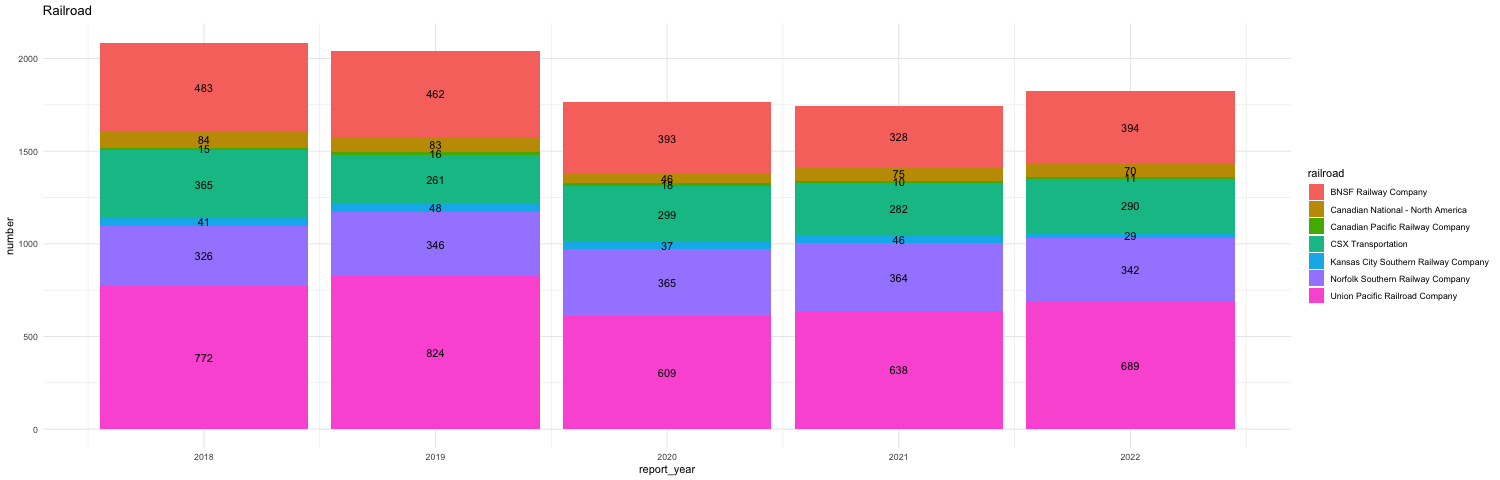

In [59]:
%%R -w 1500
ggplot(stacked_bar_accidents_df_2) +
  aes(fill=railroad, y=number, x=report_year) +
  geom_bar(position="stack", stat="identity") +
  ggtitle("Railroad") +
  theme_minimal() +
  geom_text(aes(label=number), position=position_stack(vjust=0.5))

In [64]:
derailments_df = pd.read_csv('derailments.csv')
derailments_df.head()

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month
0,NS,Norfolk Southern Railway Company,2022,22,7,Derailment,Norfolk Southern Railway Company,22 7
1,CSX,CSX Transportation,2017,17,12,Derailment,CSX Transportation,17 12
2,NS,Norfolk Southern Railway Company,2022,22,7,Derailment,Norfolk Southern Railway Company,22 7
3,UP,Union Pacific Railroad Company,2022,22,2,Derailment,Union Pacific Railroad Company,22 2
4,UP,Union Pacific Railroad Company,2022,22,11,Derailment,Union Pacific Railroad Company,22 11


In [65]:
derailments_df.railroad.value_counts()

Union Pacific Railroad Company          2024
BNSF Railway Company                    1536
Norfolk Southern Railway Company         946
CSX Transportation                       812
Canadian National - North America        169
Kansas City Southern Railway Company     146
Canadian Pacific Railway Company          34
Name: railroad, dtype: int64

In [67]:
derailments_df_groupby = derailments_df.groupby('railroad').accident_year_and_month.value_counts()
derailments_df_groupby.to_csv('derailments_df_groupby.csv')

In [70]:
%%R

# Read data
derailments_df_groupby <- read_csv('derailments_df_groupby.csv')
derailments_df_groupby

Rows: 438 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): railroad, accident_year_and_month
dbl (1): number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 438 × 3
   railroad             accident_year_and_month number
   <chr>                <chr>                    <dbl>
 1 BNSF Railway Company 19 1                        39
 2 BNSF Railway Company 19 10                       33
 3 BNSF Railway Company 19 8                        32
 4 BNSF Railway Company 18 1                        31
 5 BNSF Railway Company 18 7                        31
 6 BNSF Railway Company 20 1                        30
 7 BNSF Railway Company 17 8                        28
 8 BNSF Railway Company 17 7                        27
 9 BNSF Railway Company 22 12                       27
10 BNSF Railway Company 22 7                

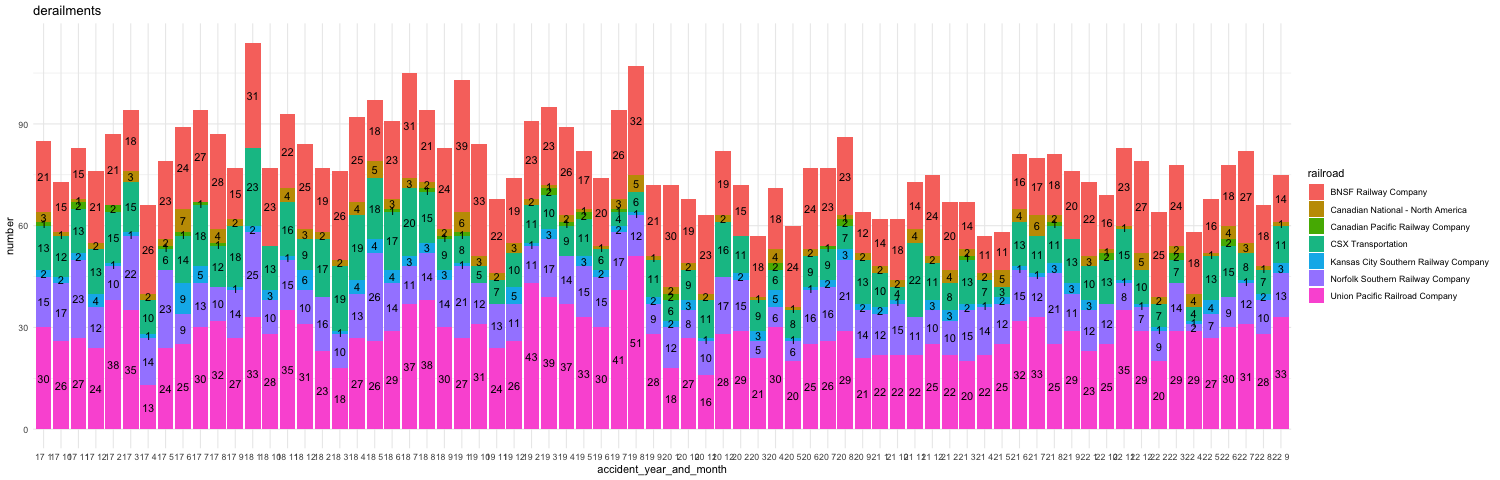

In [72]:
%%R -w 1500
ggplot(derailments_df_groupby) +
  aes(fill=railroad, y=number, x=accident_year_and_month) +
  geom_bar(position="stack", stat="identity") +
  ggtitle("derailments") +
  theme_minimal() +
  geom_text(aes(label=number), position=position_stack(vjust=0.5))

In [213]:
derailments_df_groupby_2 = derailments_df.groupby('railroad')['Report Year'].value_counts()
derailments_df_groupby_2

railroad                              Report Year
BNSF Railway Company                  2019           301
                                      2018           288
                                      2017           254
                                      2020           248
                                      2022           248
                                      2021           197
CSX Transportation                    2018           195
                                      2017           159
                                      2021           126
                                      2022           120
                                      2020           114
                                      2019            98
Canadian National - North America     2021            35
                                      2018            30
                                      2019            30
                                      2022            28
                                      

In [217]:
# Group by railroad and year and count the number of derailments
derailments_df_groupby_2 = derailments_df.groupby(['railroad', 'Report Year']).size().reset_index(name='count')

# Group by railroad and calculate the mean number of derailments per year
avg_by_railroad = derailments_df_groupby_2.groupby('railroad')['count'].mean().reset_index(name='avg_count')

# Append the average number of derailments per year for each railroad to the original dataframe
derailments_df_groupby_2 = pd.merge(derailments_df_groupby_2, avg_by_railroad, on='railroad')

# Print the updated dataframe
print(derailments_df_groupby_2)

                                railroad  Report Year  count   avg_count
0                   BNSF Railway Company         2017    254  256.000000
1                   BNSF Railway Company         2018    288  256.000000
2                   BNSF Railway Company         2019    301  256.000000
3                   BNSF Railway Company         2020    248  256.000000
4                   BNSF Railway Company         2021    197  256.000000
5                   BNSF Railway Company         2022    248  256.000000
6                     CSX Transportation         2017    159  135.333333
7                     CSX Transportation         2018    195  135.333333
8                     CSX Transportation         2019     98  135.333333
9                     CSX Transportation         2020    114  135.333333
10                    CSX Transportation         2021    126  135.333333
11                    CSX Transportation         2022    120  135.333333
12     Canadian National - North America         20

In [74]:
derailments_df_groupby_2.to_csv('derailments_df_groupby_2')

In [76]:
%%R
# Read data
derailments_df_groupby_2 <- read_csv('derailments_df_groupby_2')
derailments_df_groupby_2


Rows: 42 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): railroad
dbl (2): Report Year, number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 42 × 3
   railroad             `Report Year` number
   <chr>                        <dbl>  <dbl>
 1 BNSF Railway Company          2019    301
 2 BNSF Railway Company          2018    288
 3 BNSF Railway Company          2017    254
 4 BNSF Railway Company          2020    248
 5 BNSF Railway Company          2022    248
 6 BNSF Railway Company          2021    197
 7 CSX Transportation            2018    195
 8 CSX Transportation            2017    159
 9 CSX Transportation            2021    126
10 CSX Transportation            2022    120
# … with 32 more rows
# ℹ Use `print(n = ...)` to see more rows


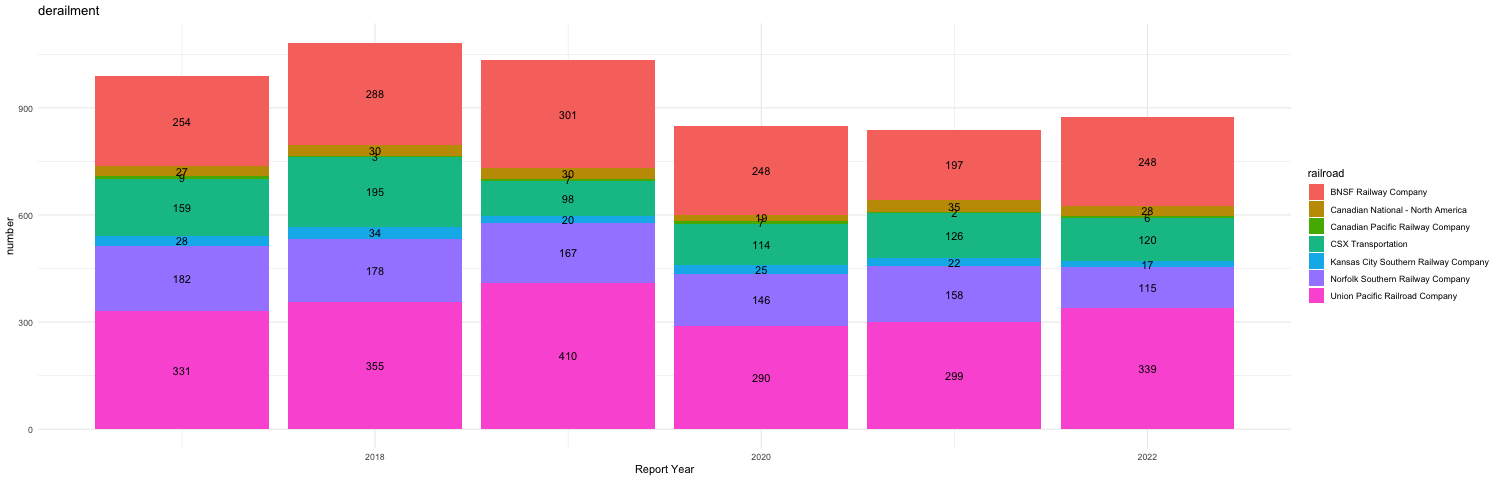

In [79]:
%%R -w 1500
ggplot(derailments_df_groupby_2) +
  aes(fill=railroad, y=number, x=`Report Year`) +
  geom_bar(position="stack", stat="identity") +
  ggtitle("derailment") +
  theme_minimal() +
  geom_text(aes(label=number), position=position_stack(vjust=0.5))

In [193]:
%%R
# Read data
railways_accident_rate <- read_csv('railways_accident_rate')
railways_accident_rate

New names:
• `` -> `...1`
Rows: 438 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): railroad, accident_year_and_month
dbl (2): ...1, accidents_per_million_miles_traveled

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 438 × 4
    ...1 railroad                             accident_year_and_month accident…¹
   <dbl> <chr>                                <chr>                        <dbl>
 1     0 Kansas City Southern Railway Company 22 1                          3.43
 2     1 Kansas City Southern Railway Company 17 11                         2.22
 3     2 Kansas City Southern Railway Company 22 5                          4.67
 4     3 Kansas City Southern Railway Company 22 2                          1.19
 5     4 Kansas City Southern Railway Company 22 7                          1.15
 6     5 Kansas City

In [196]:
railways_accident_rate = pd.read_csv('railways_accident_rate')
railways_accident_rate.head()

,Unnamed: 0,railroad,accident_year_and_month,accidents_per_million_miles_traveled
0,0,Kansas City Southern Railway Company,22 1,3.429916
1,1,Kansas City Southern Railway Company,17 11,2.223996
2,2,Kansas City Southern Railway Company,22 5,4.671260
3,3,Kansas City Southern Railway Company,22 2,1.194449
4,4,Kansas City Southern Railway Company,22 7,1.145487


In [210]:
avg_accidents = railways_accident_rate.groupby('accident_year_and_month').mean()
avg_accidents

,Unnamed: 0,accidents_per_million_miles_traveled
accident_year_and_month,,
17 1,181.142857,1.825875
17 10,208.333333,1.596857
17 11,177.285714,1.980212
17 12,198.666667,2.153475
17 2,200.333333,2.059212
...,...,...
22 5,194.333333,2.157721
22 6,203.166667,2.419318
22 7,195.333333,2.006805


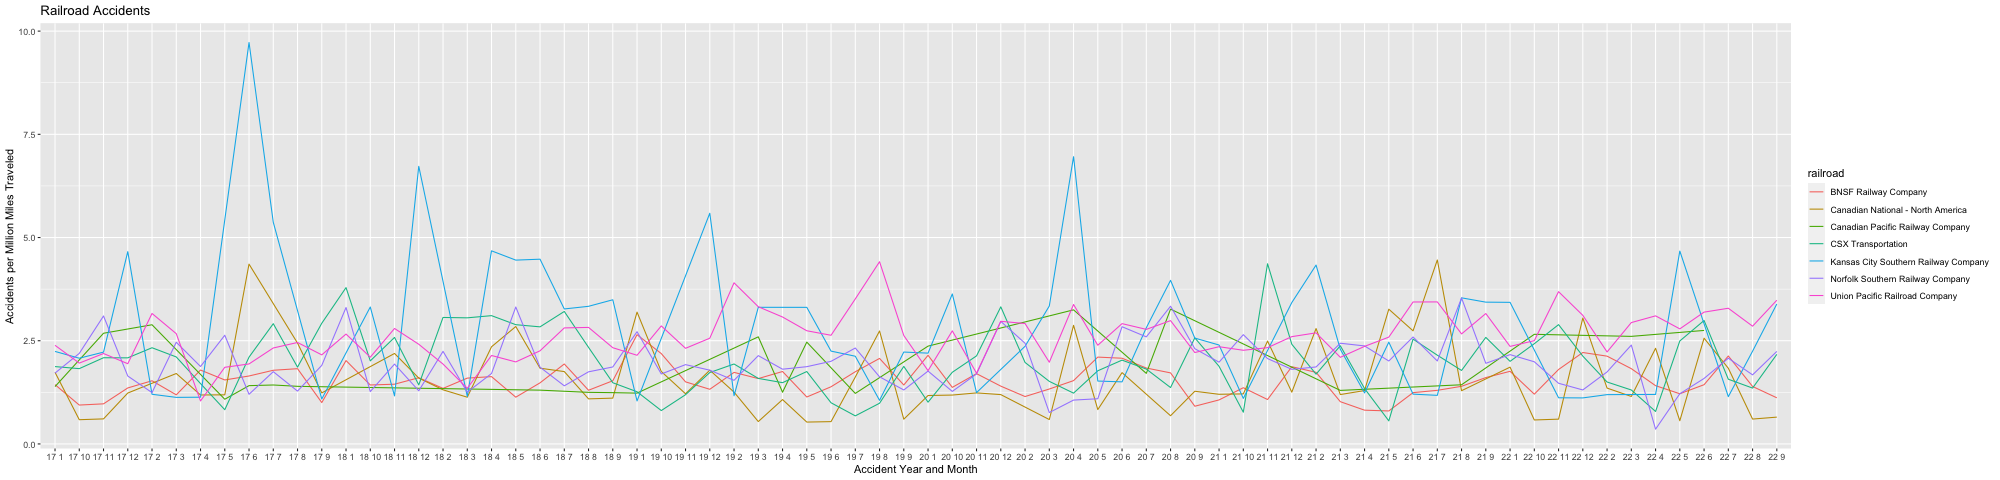

In [200]:
%%R -w 2000

ggplot(data = railways_accident_rate, aes(x = accident_year_and_month, y = accidents_per_million_miles_traveled, group = railroad, color = railroad)) + 
  geom_line() + 
  labs(x = "Accident Year and Month", y = "Accidents per Million Miles Traveled", title = "Railroad Accidents")


In [212]:
%%R

library(dplyr)

# Group the data by accident_year_and_month and calculate the mean accidents_per_million_miles_traveled for each month
avg_accidents <- railways_accident_rate %>%
  group_by(accident_year_and_month) %>%
  summarize(mean_accidents = mean(accidents_per_million_miles_traveled)) %>%
  arrange(desc(accident_year_and_month))

print(avg_accidents, n = Inf)

# A tibble: 72 × 2
   accident_year_and_month mean_accidents
   <chr>                            <dbl>
 1 22 9                              2.17
 2 22 8                              1.69
 3 22 7                              2.01
 4 22 6                              2.42
 5 22 5                              2.16
 6 22 4                              1.53
 7 22 3                              2.04
 8 22 2                              1.69
 9 22 12                             2.16
10 22 11                             1.93
11 22 10                             1.89
12 22 1                              2.26
13 21 9                              2.55
14 21 8                              2.23
15 21 7                              2.42
16 21 6                              2.29
17 21 5                              1.95
18 21 4                              1.57
19 21 3                              1.82
20 21 2                              2.52
21 21 12                             2.23
22 21 11       